In [64]:
import sys

sys.path.append("..")

%load_ext autoreload
%autoreload complete

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

from lmrecon.plotting import plot_field, format_plot, save_plot

In [66]:
t = np.arange(0, 12 * 40, 1)[:, np.newaxis]
x = 0.5 * t + 2 * np.sin(np.pi / 6 * t) + 0.4 * np.cos(t / 10)

In [67]:
def detrend(t, x):
    model = sklearn.linear_model.LinearRegression().fit(t, x)
    return t, x - model.predict(t)


def anomaly_year(t, x):
    return t, x - x.mean(axis=0)


def get_climo(x):
    return x.reshape((12, x.shape[0] // 12), order="F").mean(axis=1, keepdims=True)


def anomaly_climo(t, x):
    return t, (x.reshape((12, x.shape[0] // 12), order="F") - get_climo(x)).reshape(
        (-1, 1), order="F"
    )


def average(t, x):
    return t[6::12], x.reshape((x.shape[0] // 12, 12)).mean(axis=1, keepdims=True)

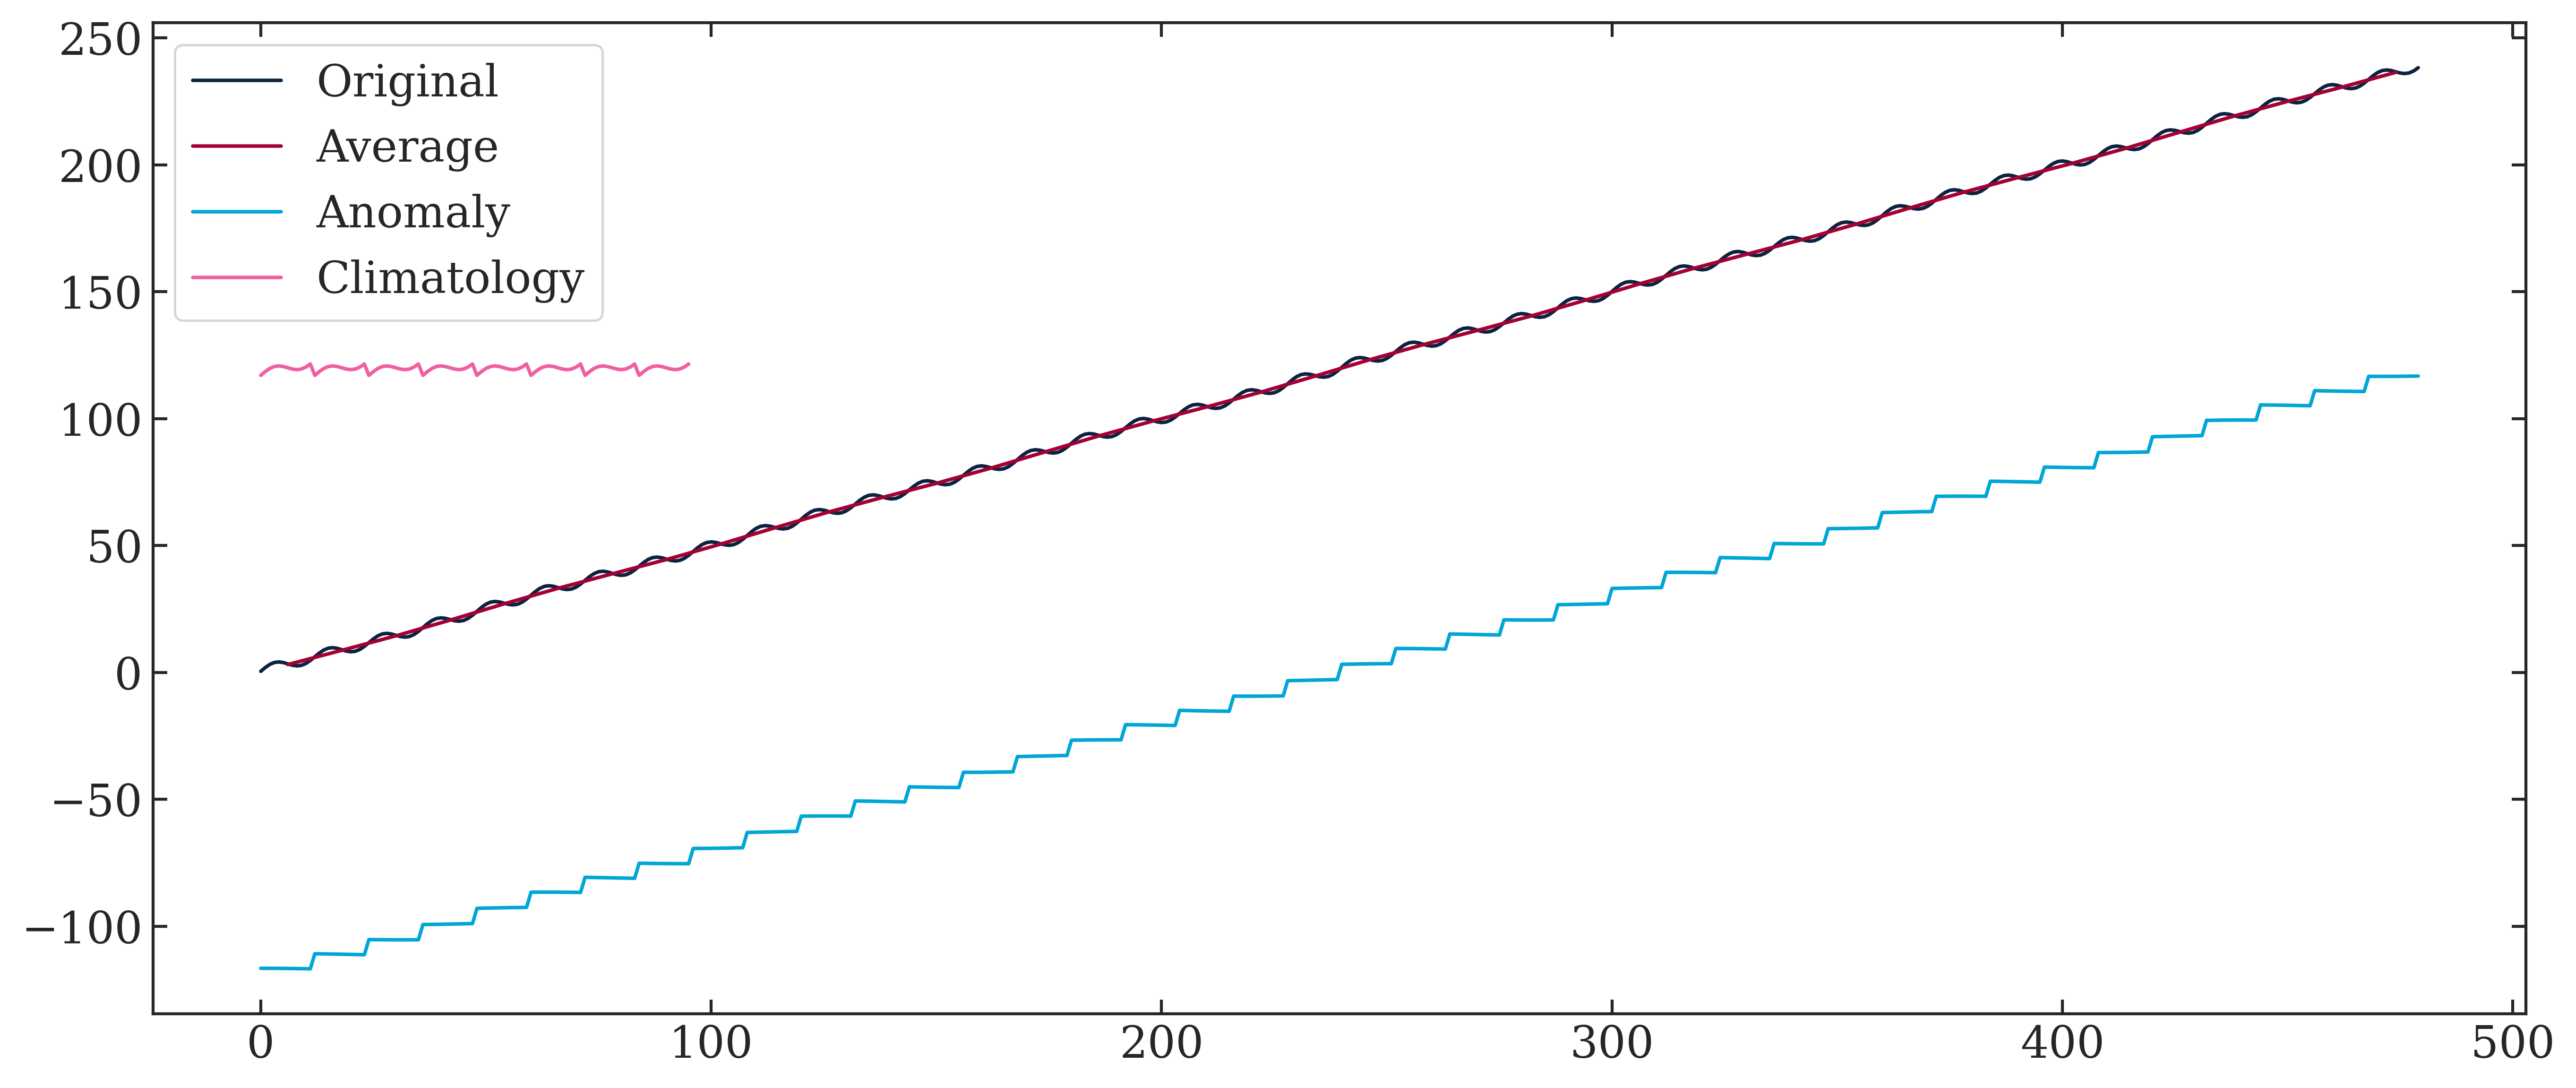

In [68]:
plt.plot(t, x, label="Original")
plt.plot(*average(t, x), label="Average")
plt.plot(*anomaly_climo(t, x), label="Anomaly")
plt.plot(np.tile(get_climo(x), (8, 1)), label="Climatology")
plt.legend()

Should reconstruct dashed line, which is detrended secular variation with seasonal signal removed:

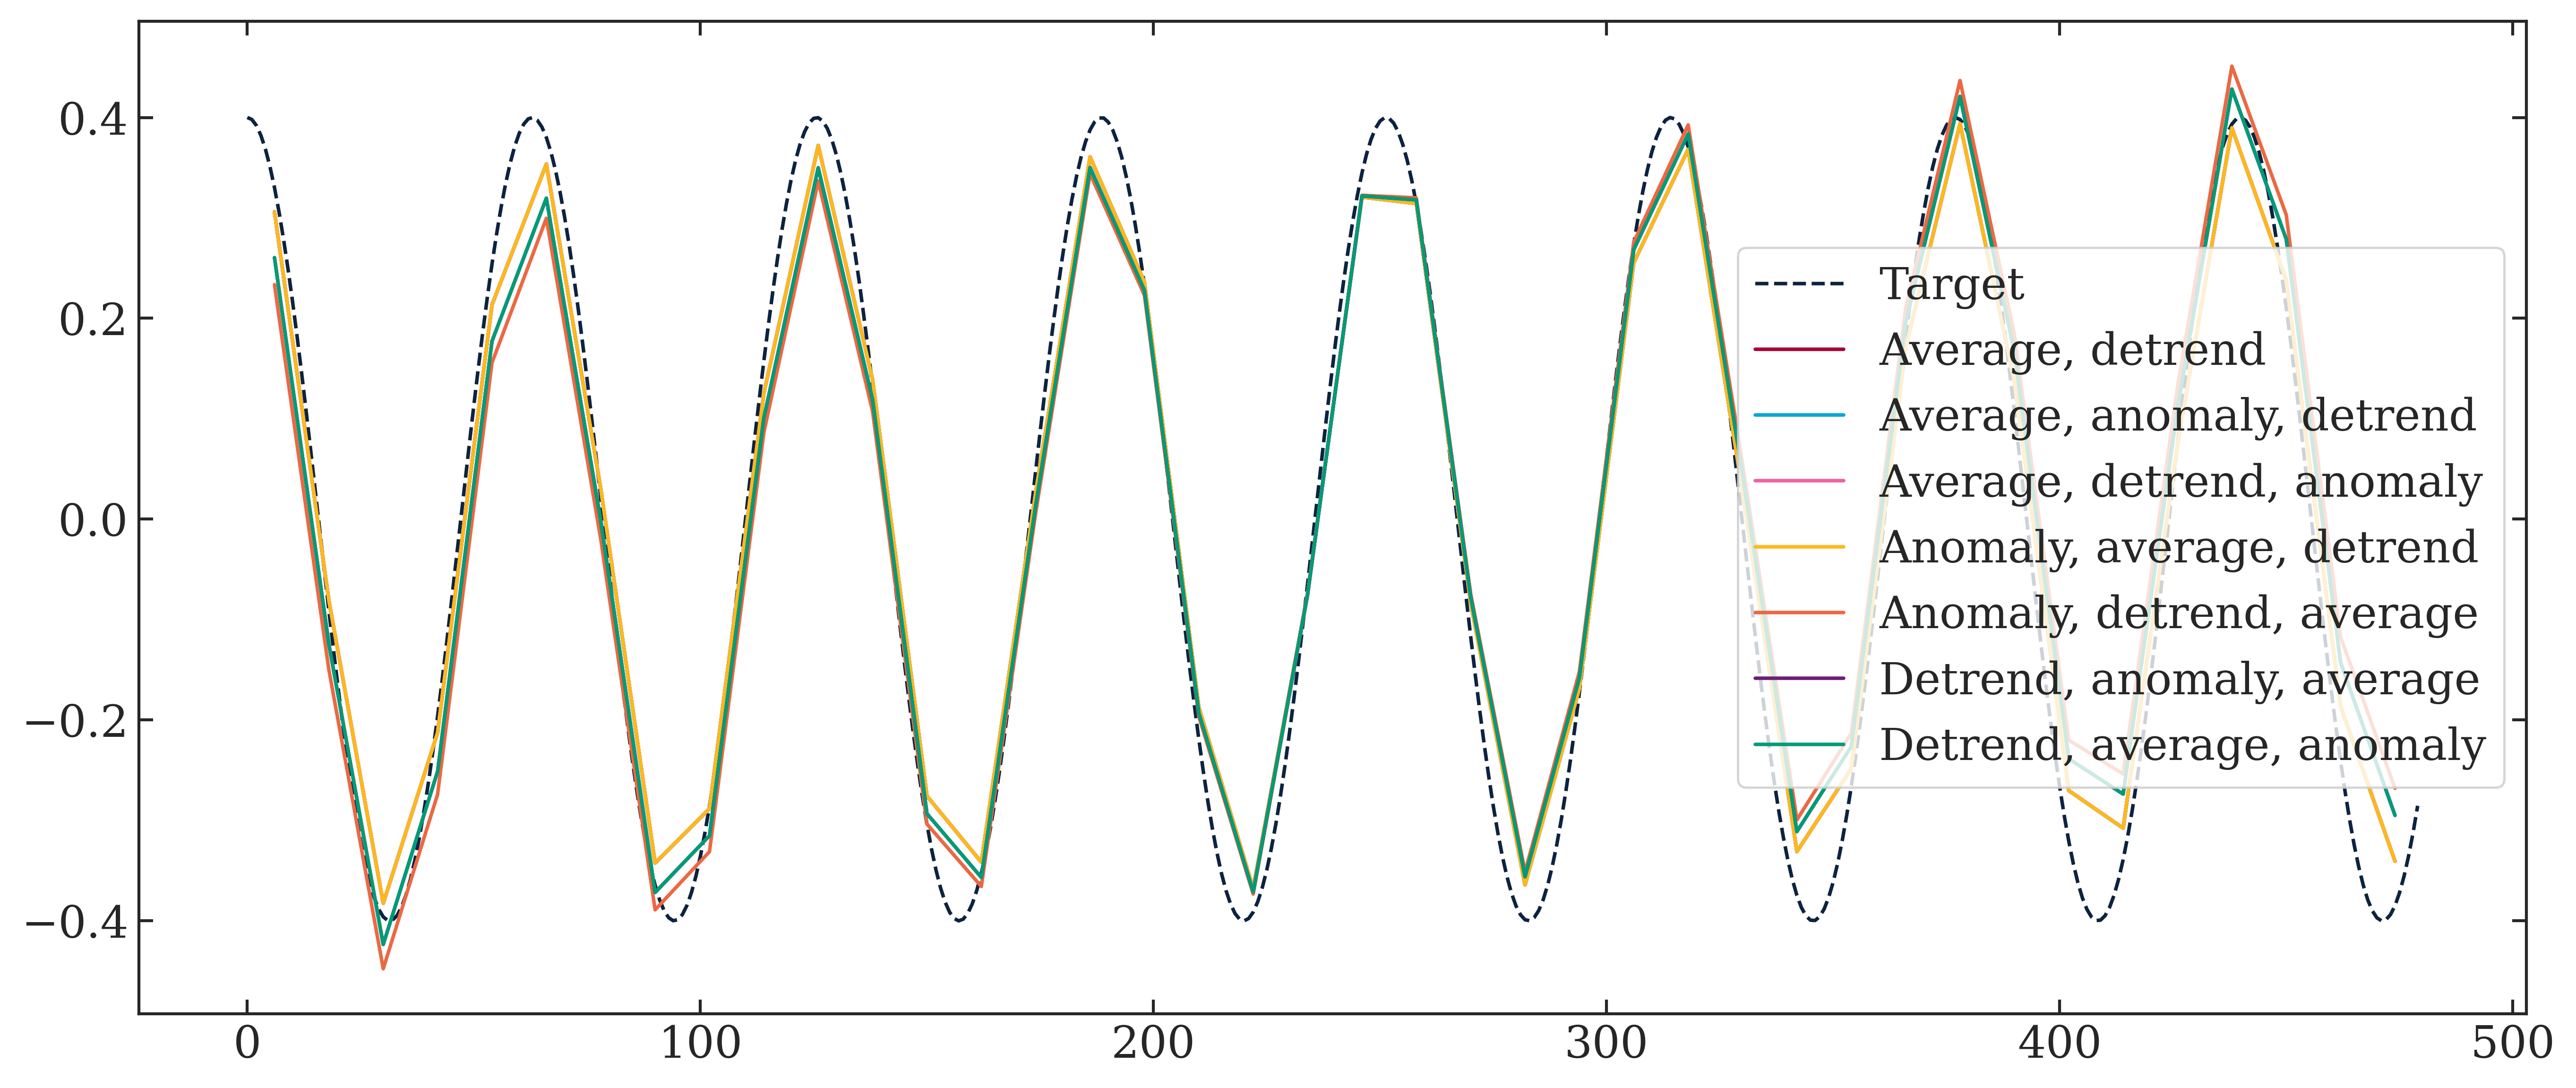

In [69]:
# plt.plot(t, x, label="Original")
plt.plot(t, 0.4 * np.cos(t / 10), label="Target", ls="--")
plt.plot(*detrend(*average(t, x)), label="Average, detrend")
plt.plot(*detrend(*anomaly_year(*average(t, x))), label="Average, anomaly, detrend")
plt.plot(*anomaly_year(*detrend(*average(t, x))), label="Average, detrend, anomaly")
plt.plot(*detrend(*average(*anomaly_climo(t, x))), label="Anomaly, average, detrend")
plt.plot(*average(*detrend(*anomaly_climo(t, x))), label="Anomaly, detrend, average")
plt.plot(*average(*anomaly_climo(*detrend(t, x))), label="Detrend, anomaly, average")
plt.plot(*anomaly_year(*average(*detrend(t, x))), label="Detrend, average, anomaly")
plt.legend()

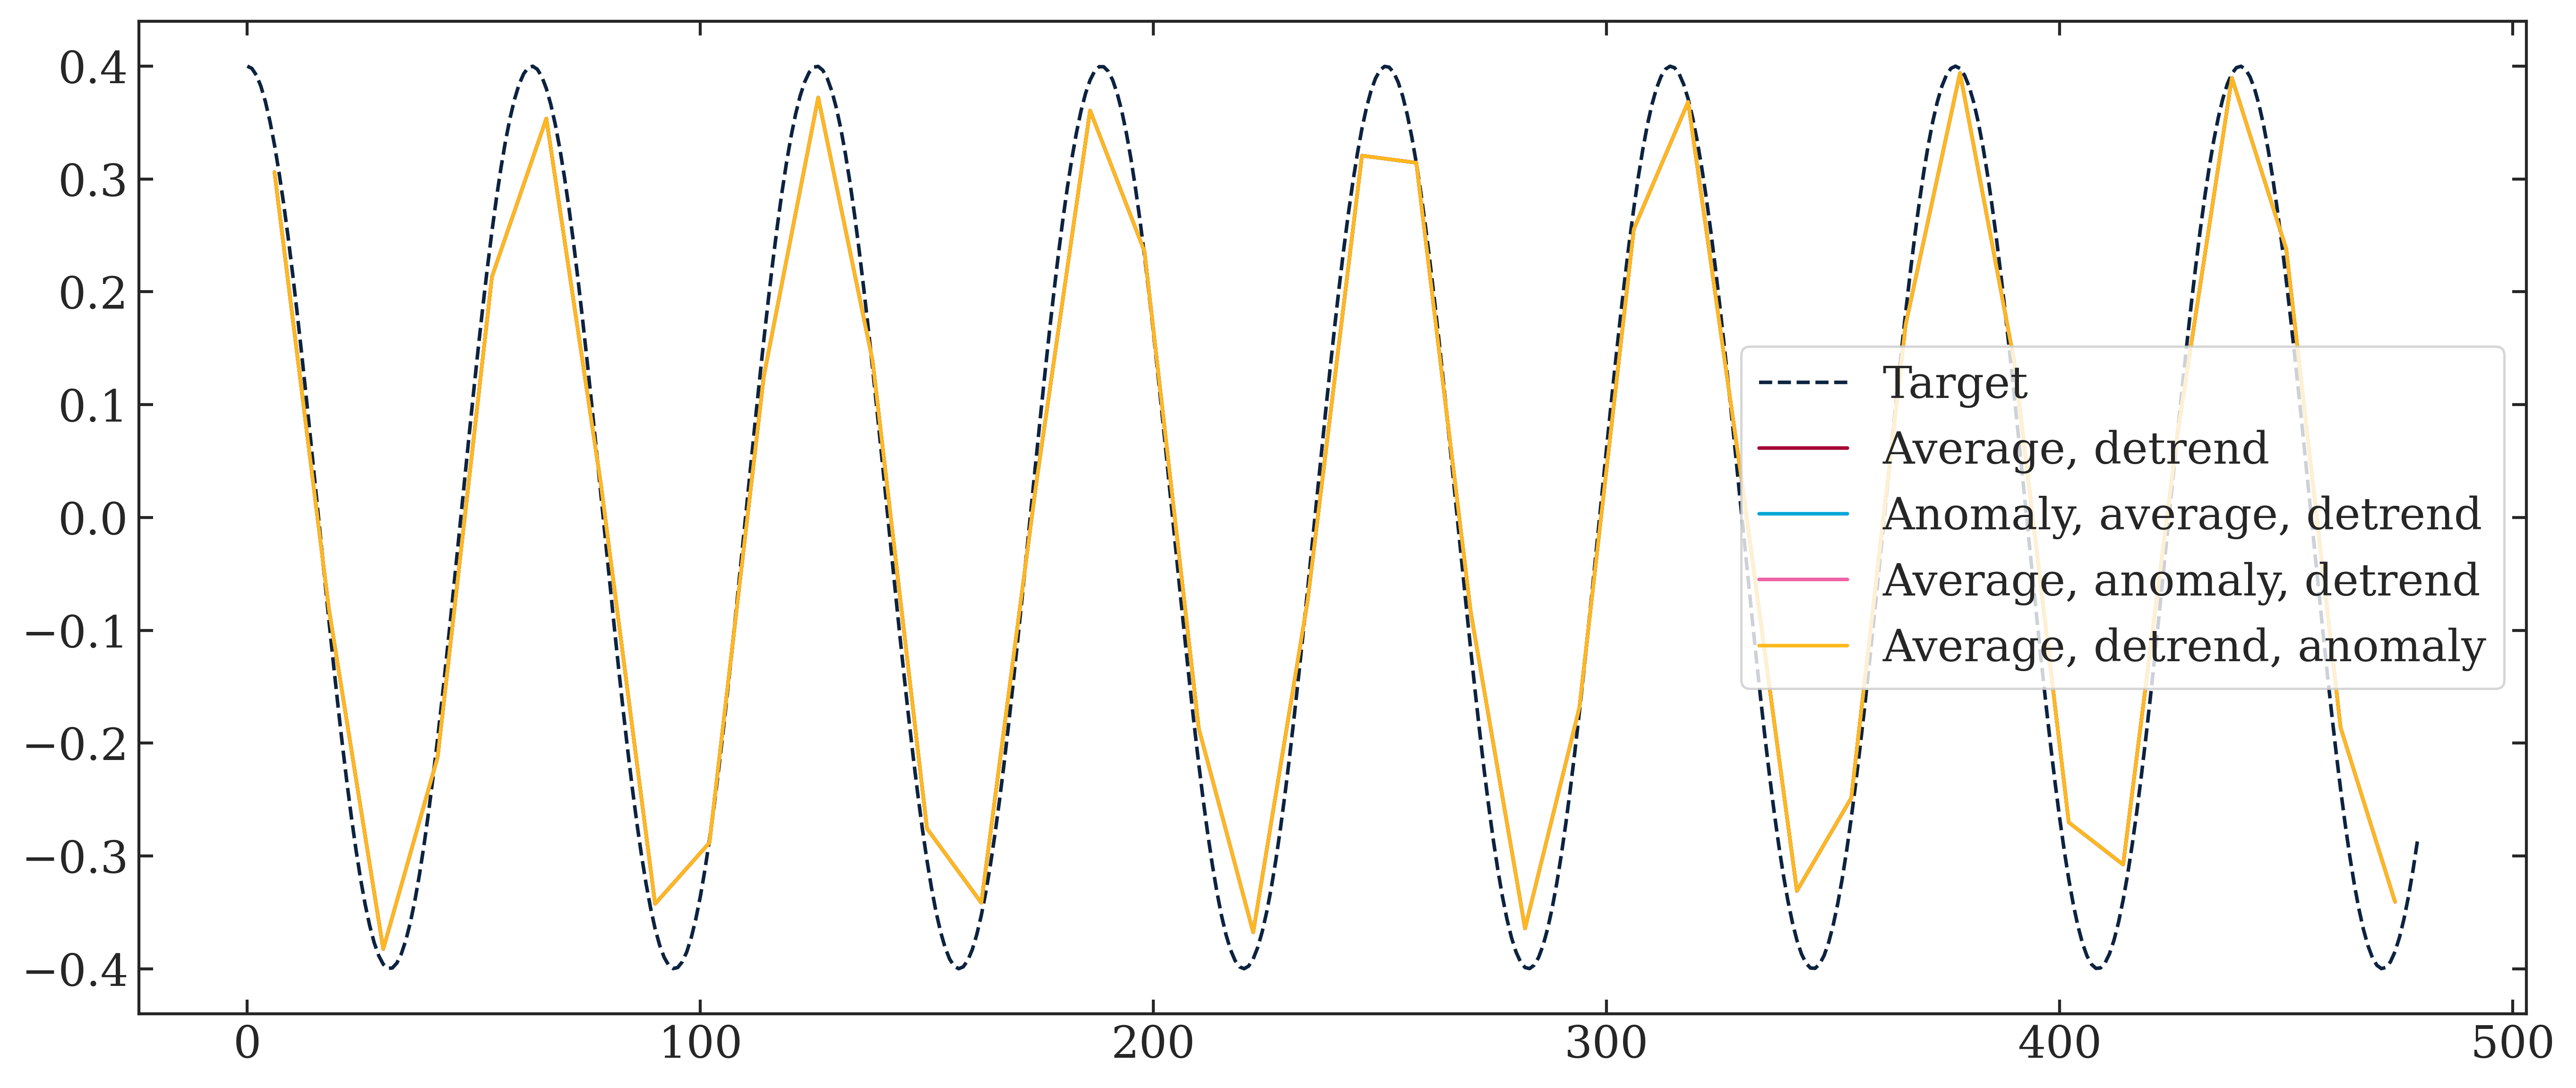

In [70]:
plt.plot(t, 0.4 * np.cos(t / 10), label="Target", ls="--")
plt.plot(*detrend(*average(t, x)), label="Average, detrend")
plt.plot(*detrend(*average(*anomaly_climo(t, x))), label="Anomaly, average, detrend")
plt.plot(*detrend(*anomaly_year(*average(t, x))), label="Average, anomaly, detrend")
plt.plot(*anomaly_year(*detrend(*average(t, x))), label="Average, detrend, anomaly")
plt.legend()

In [71]:
np.linalg.norm((detrend(*average(t, x))[1] - detrend(*average(*anomaly_climo(t, x)))[1]))

1.5728659325633429e-13

Conclusion: Only the four orders in the last plot give the correct anomalies, other orders of operation retain some linear trend. -> Average, then detrend (which converts to anomalies in the process).